Сравним два модельных уравнения репрессии генов: ур-е из учебника [1] и из статьи CA Voigt [2]. 

$$\frac{d[mRNA]}{dt} = k_{1b} +  \frac{k_1}{1+\frac{[repressor]}{K_m}} - k_2 \cdot [mRNA] \quad (1)$$ 
$$\frac{d[mRNA]}{dt} = k_{1b} +  \frac{k_1(1+ \alpha^{-1}\frac{[repressor]}{K_m})}{1+\frac{[repressor]}{K_m}} - k_2 \cdot [mRNA] \quad (2)$$ 

Параметр $\alpha$ был введен для количественной оценки связывания комплекса dCas9 с ДНК, он характеризует положение, в котором dCas9 связывается с ДНК - в случае, если мы рассматриваем комплекс-репрессор, транскрипция с промоторов, полностью связанных репрессорами будет обуславливаться текучестью промотора (со скоростью равной $k_{1b}$)

Перепишем уравнение $(2)$ с условием $\alpha^{-1} = \frac{k_{1b}}{k_1}$:

$$\frac{d[mRNA]}{dt} = k_{1b} +  \frac{k_1}{1+\frac{[repressor]}{K_m}} + \frac{k_{1b}\frac{[repressor]}{K_m}}{1+\frac{[repressor]}{K_m}} - k_2 \cdot [mRNA] \quad (3)$$

Внизу представлено численное решение уравнений $(1)$ и $(3)$:

<IPython.core.display.Javascript object>


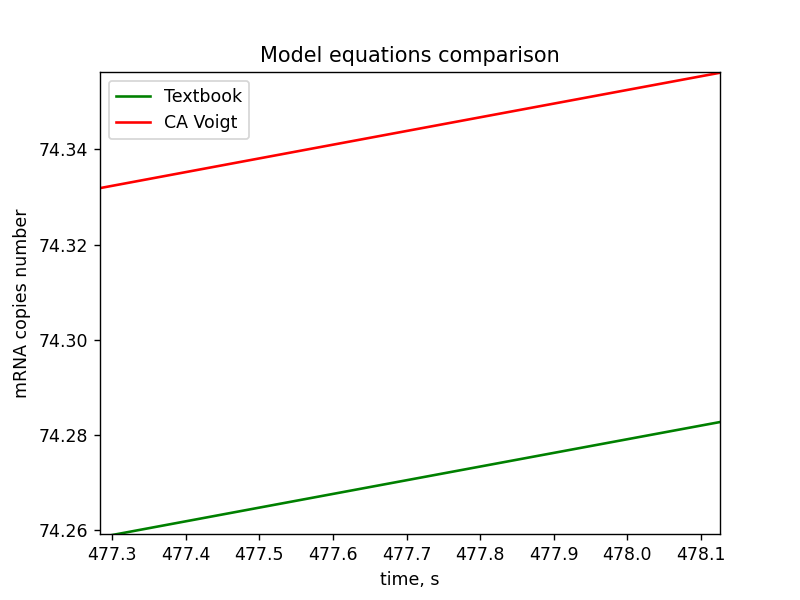

In [1]:
%matplotlib notebook

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

k1 = 0.5 #transcripts/s
k1b =  0.005#5*math.pow(10,-4) #transcripts/s
k2 = 0.0058 #1/s
r = 0.1 #number of repressors/Km
Km = 40 #number of repressors necessary to half-maximally repress a promoter

def eq1(var,t):
    m = var[0]
    dm = k1b + k1/(1+r) - k2*m
    return dm

def eq2(var,t):
    m = var
    dm = k1b + (k1 + k1b*r)/(1+r) - k2*m
    return dm

time = np.linspace(0.0,1000.0,10000)
inval = 0.0
y1 = odeint(eq1,inval,time)
y2 = odeint(eq2,inval,time)

line1, = plt.plot(time,y1,color='green', label='Textbook')
line2, = plt.plot(time,y2,color='red', label='CA Voigt')
plt.title('Model equations comparison')
plt.xlabel('time, s')
plt.ylabel('mRNA copies number')
plt.gcf().canvas.set_window_title('Model equations comparison')
plt.legend(handles=[line1, line2])
plt.show()